### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

**Data distribution**

In [ ]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")
print(s_data.head(10))

Data imported successfully
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


We plot a scatter plot of hours studied vs percentage scores to visualize the data and try to find a relationship between data.

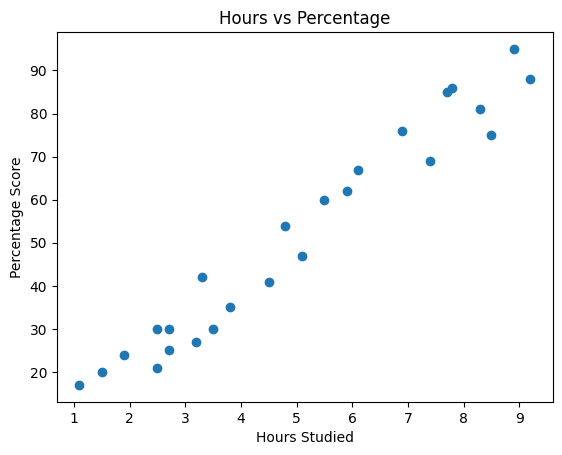

In [ ]:
# Visualize the data
plt.scatter(s_data['Hours'], s_data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

There is a positive linear relation between the number of hours studied and percentage of score.

**Data preparation**

In [ ]:
# Prepare the data
X = s_data[['Hours']]
y = s_data['Scores']

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the algorithm**

In [ ]:
# Train the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

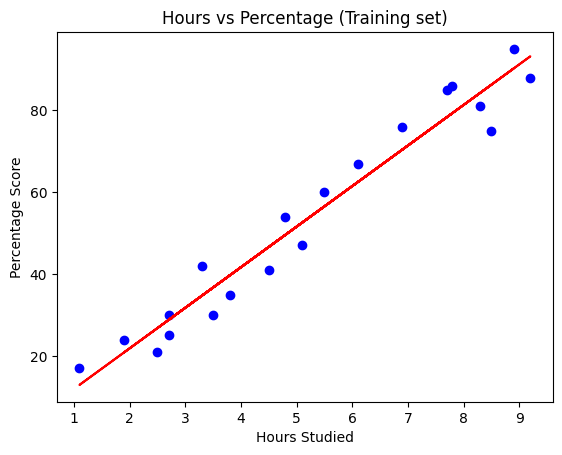

In [ ]:
# Plotting the regression line
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Hours vs Percentage (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

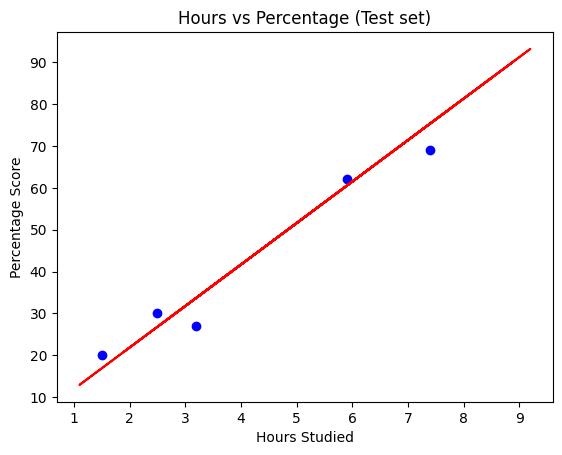

In [ ]:
# Plotting for the test data
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.title('Hours vs Percentage (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

**Making predictions**

In [ ]:
# Make predictions
y_pred = regressor.predict(X_test)
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_compare)

    Actual  Predicted
5       20  16.884145
2       27  33.732261
19      69  75.357018
16      30  26.794801
11      62  60.491033


In [ ]:
# Predict the score for 9.25 hours/day
predicted_score = regressor.predict([[9.25]])
print(f"Predicted Score for 9.25 hours/day: {predicted_score[0]:.2f}")

Predicted Score for 9.25 hours/day: 93.69


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Model evaluation**

In [ ]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error: 4.18
Mean Squared Error: 21.60
Root Mean Squared Error: 4.65
R^2 Score: 0.95


The model's predictions are quite accurate:

The errors (MAE, MSE, RMSE) are relatively low, indicating good prediction accuracy.
The R² score is very high, implying that the model explains a large portion of the variance in the scores based on study hours.
Overall, the linear regression model is performing very well on this dataset, and it is reasonable to use it for predicting student scores based on the number of study hours.